In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that the visualizations are shown within the notebook
%matplotlib inline


In [2]:
# Load the dataset
data = pd.read_csv('Amazon Sales data.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [3]:
# Drop rows with missing values
data.dropna(inplace=True)

# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Drop duplicates if any
data.drop_duplicates(inplace=True)


In [4]:
# Extract year and month from 'Order Date'
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month
data['Year_Month'] = data['Order Date'].dt.to_period('M')

# Display the modified dataset
data.head()


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Year_Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2010-05
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,2012-08
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2014-05
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2014-06
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,2013-02


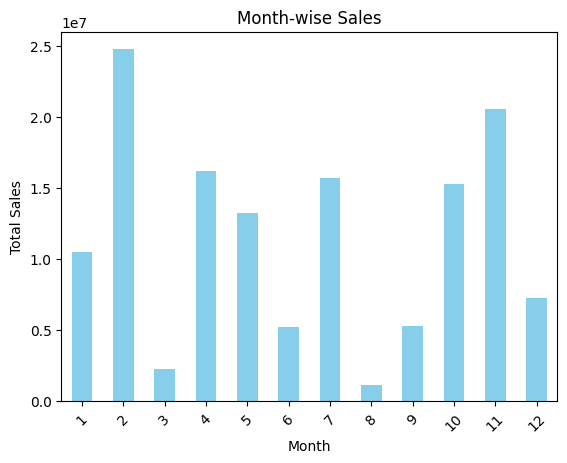

In [25]:
monthly_sales = data.groupby('Month')['Total Revenue'].sum()
monthly_sales.plot(kind='bar', color='skyblue', title='Month-wise Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


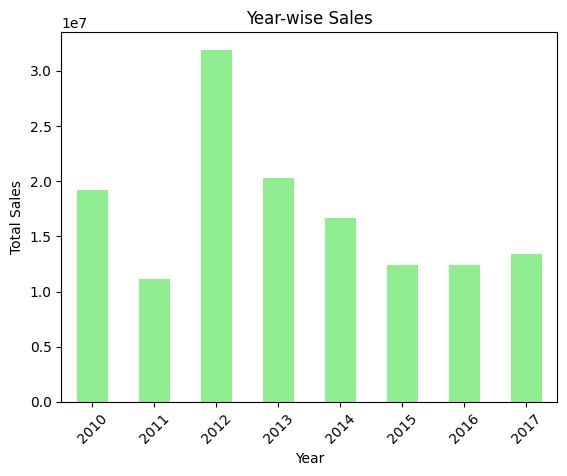

In [5]:
yearly_sales = data.groupby('Year')['Total Revenue'].sum()
yearly_sales.plot(kind='bar', color='lightgreen', title='Year-wise Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


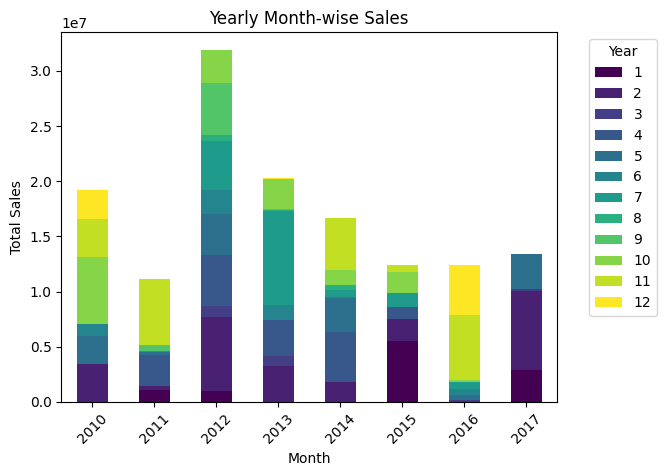

In [6]:
yearly_monthly_sales = data.groupby(['Year', 'Month'])['Total Revenue'].sum().unstack()
yearly_monthly_sales.plot(kind='bar', stacked=True, colormap='viridis', title='Yearly Month-wise Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


In [7]:
average_order_value = data['Total Revenue'].mean()
print(f'Average Order Value: {average_order_value}')


Average Order Value: 1373487.6831


In [8]:
orders_per_year = data.groupby('Year')['Order ID'].nunique()
print('Number of Orders per Year:')
print(orders_per_year)


Number of Orders per Year:
Year
2010    10
2011    12
2012    22
2013    12
2014    15
2015    11
2016    10
2017     8
Name: Order ID, dtype: int64


In [9]:
sales_per_category = data.groupby('Item Type')['Total Revenue'].sum()
print('Total Sales per Product Category:')
print(sales_per_category)


Total Sales per Product Category:
Item Type
Baby Food          10350327.60
Beverages           2690794.60
Cereal              5322898.90
Clothes             7787292.80
Cosmetics          36601509.60
Fruits               466481.34
Household          29889712.29
Meat                4503675.75
Office Supplies    30585380.07
Personal Care       3980904.84
Snacks              2080733.46
Vegetables          3089057.06
Name: Total Revenue, dtype: float64


In [10]:
data.to_csv('Cleaned_Amazon_Sales_Data.csv', index=False)


In [11]:
total_profit = data['Total Profit'].sum()
print(f'Total Profit: {total_profit}')


Total Profit: 44168198.39999999


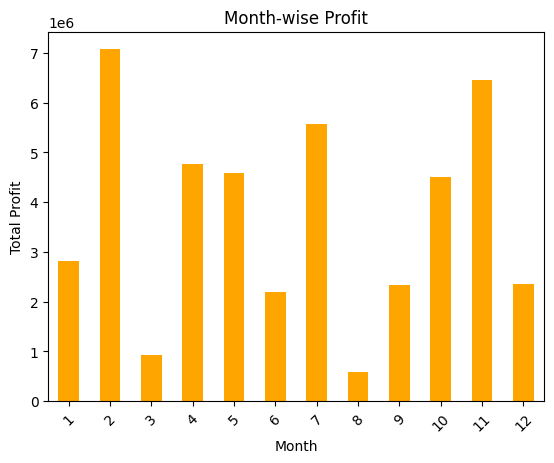

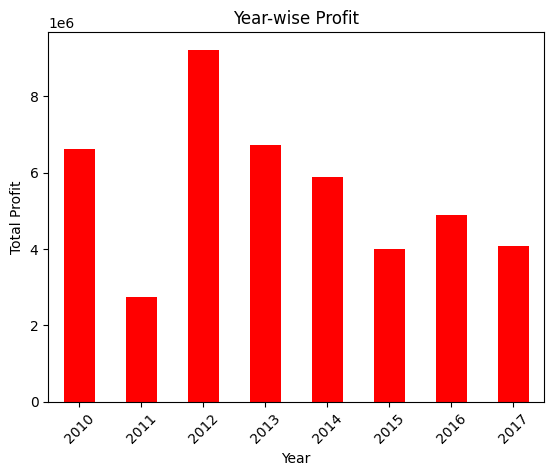

In [12]:
# MONTH WISE PROFIT

monthly_profit = data.groupby('Month')['Total Profit'].sum()
monthly_profit.plot(kind='bar', color='orange', title='Month-wise Profit')
plt.xlabel('Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

# YEAR WISE PROFIT
yearly_profit = data.groupby('Year')['Total Profit'].sum()
yearly_profit.plot(kind='bar', color='red', title='Year-wise Profit')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()


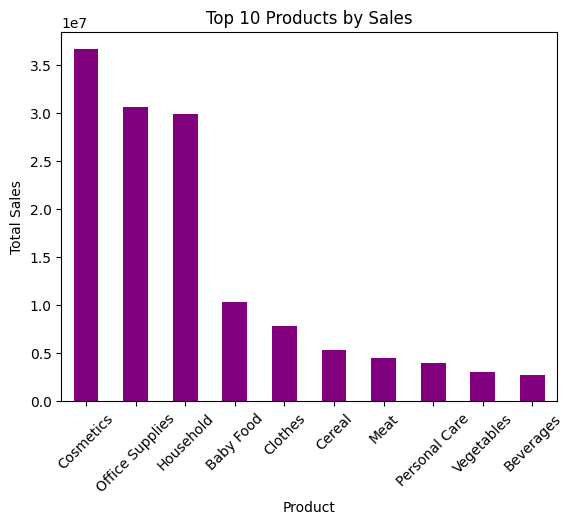

In [13]:
#SALES BY TOP PRODUCTS

top_products = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='purple', title='Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


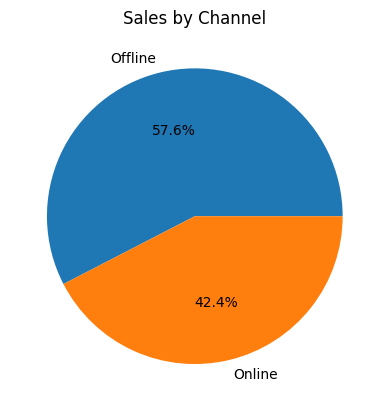

In [14]:
#SALES BY CHANNEL

sales_by_channel = data.groupby('Sales Channel')['Total Revenue'].sum()
sales_by_channel.plot(kind='pie', autopct='%1.1f%%', title='Sales by Channel')
plt.ylabel('')
plt.show()


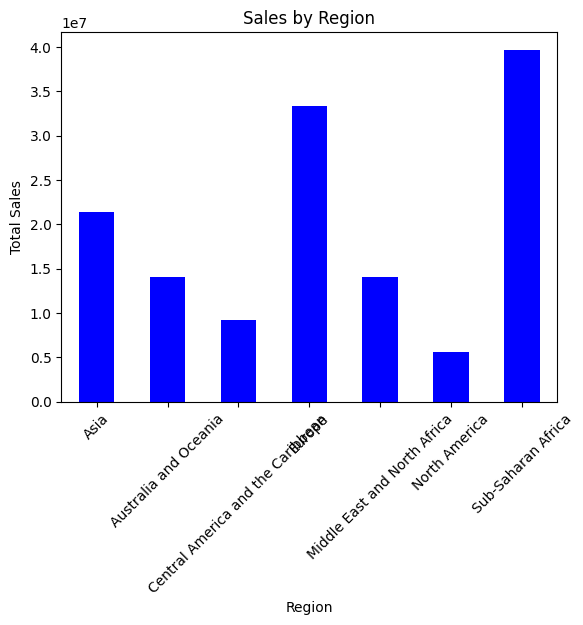

In [36]:
#SALES BY REGION

sales_by_region = data.groupby('Region')['Total Revenue'].sum()
sales_by_region.plot(kind='bar', color='blue', title='Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


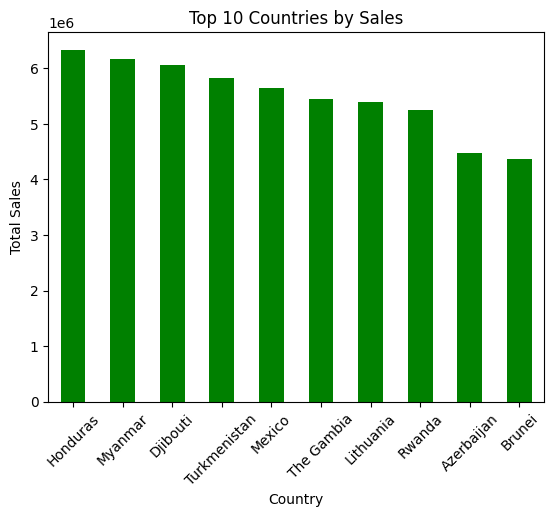

In [15]:
#SALES BY COUNTRY

top_countries = data.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', color='green', title='Top 10 Countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


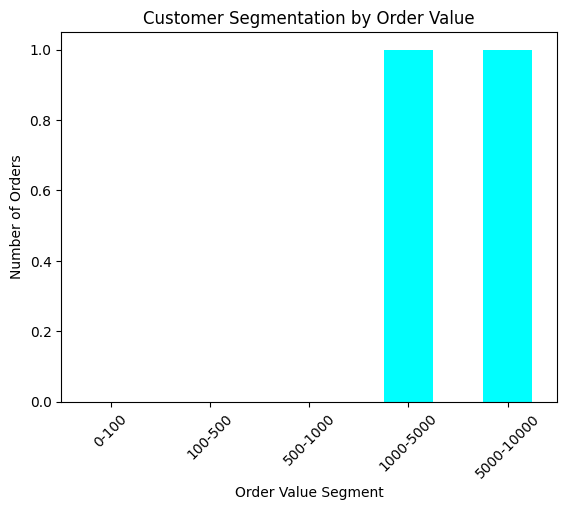

In [16]:
bins = [0, 100, 500, 1000, 5000, 10000]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000']
data['Order Value Segment'] = pd.cut(data['Total Revenue'], bins=bins, labels=labels)

segment_counts = data['Order Value Segment'].value_counts().sort_index()
segment_counts.plot(kind='bar', color='cyan', title='Customer Segmentation by Order Value')
plt.xlabel('Order Value Segment')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


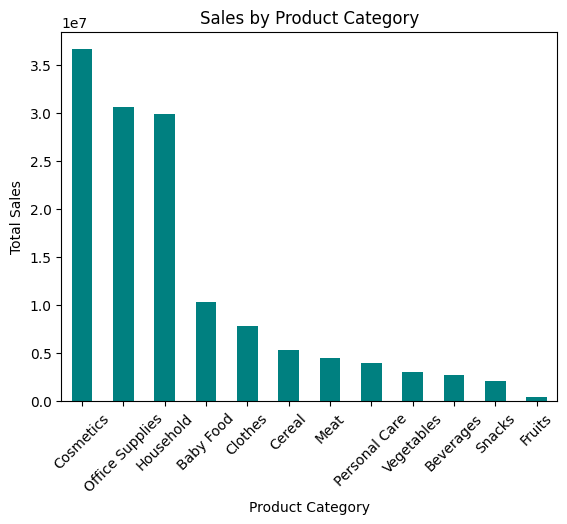

In [17]:
# Sales Performance by Product Category

sales_by_category = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', color='teal', title='Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
